# Bin Packing Lab

- Authors:
  - Jinal Kasturiarachchi, kasturij@mcmaster.ca
  - Maged Armanios, armanm5@mcmaster.ca
- Group ID on Avenue: binpack 32
- Gitlab URL: https://gitlab.cas.mcmaster.ca/kasturij/l2-bin-packing

## How to use the provided code?

_(this section is just here for information, you can get rid of it in your own report)_

In [1]:
from macpacking.reader import DatasetReader, BinppReader, JburkardtReader, SolutionReader
from macpacking.model  import Online, Offline
import macpacking.algorithms.offline as offline

Now that the business code is imported, we can load an existing dataset

In [2]:
dataset = '_datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt'
reader: DatasetReader = BinppReader(dataset)
print(f'Dataset: {dataset}')
print(f'  - Bin Capacity: {reader.offline()[0]}')
print(f'  - Objects to pack: {sorted(reader.offline()[1])}')

Dataset: _datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt
  - Bin Capacity: 100
  - Objects to pack: [8, 8, 12, 13, 13, 14, 15, 17, 18, 19, 20, 23, 30, 37, 37, 39, 40, 43, 43, 44, 44, 50, 51, 61, 61, 62, 62, 63, 66, 67, 69, 70, 71, 72, 75, 76, 76, 79, 83, 83, 88, 92, 92, 93, 93, 97, 97, 97, 99, 100]


Acording to the `oracle.xslx` file, we now that the optimal solution for this case is to use _31_ bins. Let's call the baseline algorithm, which is an offline one, and see how it performs.

In [3]:
import macpacking.algorithms.baseline as baseline
strategy: Offline = baseline.BenMaier()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40], [43, 43, 14], [50, 44], [51, 44], [61], [61, 39], [62], [62, 37], [63, 37], [66], [67], [69], [70, 30], [71], [72, 13, 13], [75, 18], [76, 19], [76, 23], [79, 20], [83, 15], [83, 17], [88, 12], [92, 8], [92, 8], [93], [93], [97], [97], [97], [99], [100]]


So the baseline finds the optimal solution. That's good news! Let's call our very own version of `NextFit`, as an offline algorithm.

In [4]:
import macpacking.algorithms.online as online
strategy: Offline = offline.NextFitOff()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 35
[[14, 13, 13, 12, 8, 8], [20, 19, 18, 17, 15], [37, 30, 23], [39, 37], [43, 40], [44, 43], [50, 44], [51], [61], [61], [62], [62], [63], [66], [67], [69], [70], [71], [72], [75], [76], [76], [79], [83], [83], [88], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


Damn it, this algorithm is 4 bins far from the optimal solution! Let's try an online version. Usually, they perform worst, so let's measure it.

In [5]:
strategy: Online = online.NextFitOn()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 36
[[13, 61], [15, 70], [19], [20, 23], [37, 43, 14], [39], [40, 8, 18], [43], [44], [44, 50], [51, 30], [61], [62], [62, 37], [63, 17, 13], [66], [67], [69], [71], [72], [75], [76], [76, 8, 12], [79], [83], [83], [88], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


As expected, the online version is worst!

In [6]:
c_file = '_datasets/jburkardt/p04_c.txt'
w_file = '_datasets/jburkardt/p04_w.txt'
reader: DatasetReader = JburkardtReader(c_file, w_file) 
print(f'Capacity File: {c_file}')
print(f'Weights File: {w_file}')
print(f'  - Bin Capacity: {reader.offline()[0]}')
print(f'  - Objects to pack: {(reader.offline()[1])}')

Capacity File: _datasets/jburkardt/p04_c.txt
Weights File: _datasets/jburkardt/p04_w.txt
  - Bin Capacity: 524
  - Objects to pack: [10, 252, 127, 106, 10, 127, 12, 252, 46, 127, 106, 127, 10, 106, 12, 37, 10, 252, 106, 84, 252, 85, 37, 252, 10, 252, 10, 9, 127, 12, 442, 252]


In [7]:
import macpacking.algorithms.baseline as baseline
strategy: Offline = baseline.BenMaier()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 8
[[10, 9], [106, 106, 106, 85, 84, 37], [127, 127, 127, 106, 37], [252, 127, 127, 12], [252, 252, 10, 10], [252, 252, 12], [252, 252, 12], [442, 46, 10, 10, 10]]


In [8]:
import macpacking.algorithms.online as online
strategy: Offline = offline.NextFitOff()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 8
[[46, 37, 37, 12, 12, 12, 10, 10, 10, 10, 10, 10, 9], [106, 106, 106, 85, 84], [127, 127, 127, 106], [252, 127, 127], [252, 252], [252, 252], [252, 252], [442]]


In [9]:
strategy: Online = online.NextFitOn()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 9
[[9, 127, 12], [10, 252, 127, 106, 10], [37, 10, 252, 106, 84], [127, 12, 252, 46], [127, 106, 127, 10, 106, 12], [252], [252, 10, 252, 10], [252, 85, 37], [442]]


## Explanation of how the code follows SOLID Principles

S: The single responsibility principle states that each class should only have one purpose. The sample code provided included four classes, these classes are BinPPReader, NextFit_ON, NextFit_Off, and BenMaier. Additionally there are other interfaces and abstract classes. Amongst the four, they only have one specific responsibility. BinPP is used to read data in the BinPP format, BenMaier solves the Binpacking problem using the BenmMaire algorithm, and the nextfit classes solve the problem using the nextfit algorithm (either offline or online).

O: The open closed principle states that objects or entities should be open for extension but closed for modification. In addition the the classes provided, the code includes a set of abstract classes. These include Online, Offline, and DatasetReader. These classes contain abstract methods that allow us to implement different algorithms/readers. Such as creating a specific data set reader to read the BinPP format without having to modify and existing code (Dataset reader) or implmenenting a new offline algorithm without having to modify current code (Abstract Class Offline)

L: Liskov's substitution principle states that properties on objects of a certain type T hold for objects of type S which are substypes of T. As of now we don't have any subclasses, rather we have implementations of abstract classes so we will forget about Liskov's rule for now

I: Interface segregation states that no code should be forced to depend on methods it does not use. The given code follows this principle by implementing abstract methods which are changed depending on the use case of the class. Such as \_load_data_from_disk() and \_process()

D: Dependancy Inversion has two components. 
1. High-level modules should not import anything from low-level modules; they should both depend on abstractions
2. Abstractions should not depend on concrete implementations; concrete implementations should depend on abstractions

The starting code does not violate either of these two rules. Online, offline, and Dataset reader do not depend on any concretions while BinppReader, BenMaier, Nextfit_off/On rely on abstract classes only and feature no imports from low level modules.

## Dimensions of the dataset

For the data, there are three parameters to take into account.
1. The amount of items 
2. The weights of each item
3. The bin capacity
These parameters are important because adjusting them can help us model real world problems. For example, in an amazon warehouse they may receive many items of small weights and have medium bin capacities. By using the datasets with these characteristics we can find the best algorithm for this scenario. 

## Demonstration of T2 Algorithms

In [10]:
strategy: Online = online.FirstFitOn()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 8
[[10, 252, 127, 106, 10, 12], [127, 106, 127, 106, 37, 12], [127, 252, 46, 10, 12, 37, 10, 10, 10, 9], [252], [252, 85, 127], [252, 106, 84], [252, 252], [442]]


In [11]:
strategy: Online = online.BestFitOn()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 8
[[10, 252, 127, 106, 10, 12], [127, 106, 127, 106, 12, 37, 9], [127, 252, 46, 10, 10, 37, 10, 12], [252], [252, 85, 127], [252, 106, 84], [252, 252, 10], [442]]


In [12]:
strategy: Online = online.WorstFitOn()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 8
[[10, 252, 127, 106, 10], [127, 12, 252, 46, 12, 37], [127, 106, 127, 10, 106, 10], [252], [252, 10, 252], [252, 85, 37, 10, 9, 127], [252, 106, 84, 12], [442]]


In [13]:
strategy: Offline = offline.FirstFitOff()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 7
[[106, 106, 106, 85, 84, 37], [127, 127, 127, 106, 37], [252, 127, 127, 9], [252, 252, 10, 10], [252, 252, 10, 10], [252, 252, 10, 10], [442, 46, 12, 12, 12]]


In [14]:
strategy: Offline = offline.BestFitOff()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 8
[[10, 9], [106, 106, 106, 85, 84, 37], [127, 127, 127, 106, 37], [252, 127, 127, 12], [252, 252, 10, 10], [252, 252, 12], [252, 252, 12], [442, 46, 10, 10, 10]]


In [15]:
strategy: Offline = offline.WorstFitOff()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 8
[[9], [106, 106, 106, 85, 84, 37], [127, 127, 127, 106, 37], [252, 127, 127, 10], [252, 252, 10, 10], [252, 252, 10, 10], [252, 252, 12], [442, 46, 12, 12, 10]]


## Analysis of the algorithms - N1C3W2

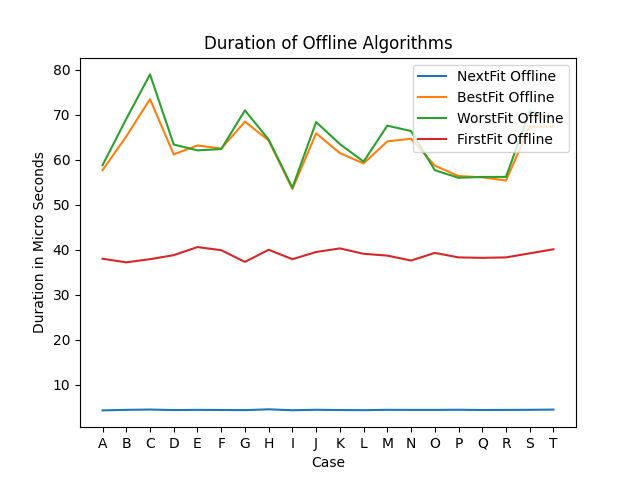

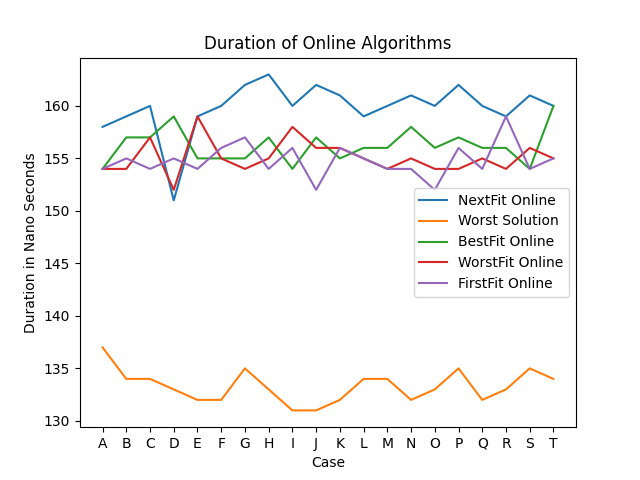

Note: Error bars omitted because they clutter the graph and make it too hard to read. To see error bars, go to ./analysis_tools/bench_grapher.py and uncomment the block comments containing "plt.errorbar(...

In terms of runetime, the offline algorithms all take significantly longer than their online counterparts. This is most likely due to the offline algorithms sorting the data before running the same algorithm as their online counterpart. 

Amongst the online algorithms, the worst solution takes the least amount of time. Averaging ~15 ns less than other algoritms. We suspect this is due to it not having any actual logic in its design, reducing runtime.

For the offline algorithms, nextFitOff takes drastically less time than all the other algorithms. We are unsure as to why this is the case as its online counterpart is argueably the slowest online algorithm. Perhaps the combination of a sorted dataset and the algorithm allow it to run at its fastest. Bestfit and Worstfit almost take the same amount of time. This is most likely due to them having the same logic with the only difference is one keeps track of the most full bin and the other the least full bin.

## Solution Reader

In [16]:
fileList = ['./_datasets/binpp/N4C2W2/N4C2W2_A.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_B.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_C.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_D.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_E.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_F.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_G.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_H.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_I.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_J.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_K.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_L.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_M.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_N.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_O.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_P.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_Q.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_R.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_S.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_T.BPP.txt']
solutionFile = './_datasets/solutions/binpp.csv'
reader = SolutionReader(fileList, solutionFile)
result = reader.readSolutions()
print(result)

[253, 254, 249, 258, 257, 272, 252, 255, 262, 256, 259, 263, 261, 264, 253, 266, 257, 256, 273, 256]


## Improvement Margins

In [17]:
from analysis_tools.improvement_margin import run_analyze_correctness, list_case_files
from macpacking.algorithms.offline import NextFitOff as NFOff, WorstFitOff as WFOff, BestFitOff as BFOff, FirstFitOff as FFOff
from macpacking.algorithms.online import NextFitOn as NFOn, WorstSolution as WS, WorstFitOn as WFOn, BestFitOn as BFOn, FirstFitOn as FFOn
import matplotlib.pyplot as plt


In [18]:
CASESFifty = './_datasets/binpp/N1C2W2'
CASESHundred = './_datasets/binpp/N2C2W2'
CASESTwohundred = './_datasets/binpp/N3C2W2'
CASESFivehundred = './_datasets/binpp/N4C2W2'
OFFLINE_STRATEGIES = [
    NFOff, WFOff, BFOff, FFOff
]

ONLINE_STRATEGIES = [
    NFOn, WS, WFOn, BFOn, FFOn
]

casesFifty = list_case_files(CASESFifty)
casesHundred = list_case_files(CASESHundred)
casesTwohundred = list_case_files(CASESTwohundred)
casesFivehundred = list_case_files(CASESFivehundred)

[avg_excess_fifty, correct_percentage_fifty] = run_analyze_correctness(casesFifty, OFFLINE_STRATEGIES + ONLINE_STRATEGIES)
[avg_excess_hundred, correct_percentage_hundred] = run_analyze_correctness(casesHundred, OFFLINE_STRATEGIES + ONLINE_STRATEGIES)
[avg_excess_twohundred, correct_percentage_twohundred] = run_analyze_correctness(casesTwohundred, OFFLINE_STRATEGIES + ONLINE_STRATEGIES)
[avg_excess_fivehundred, correct_percentage_fivehundred] = run_analyze_correctness(casesFivehundred, OFFLINE_STRATEGIES + ONLINE_STRATEGIES)
# for funcName in avg_excess:
#     print(f'{funcName} mean excess {avg_excess[funcName]}')
#     print(f'{funcName} Correct % = {correct_percentage[funcName]}')
#     print()

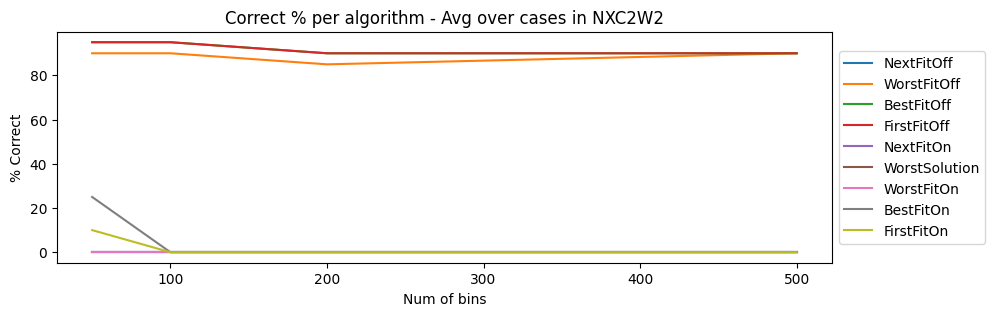

In [19]:
plt.figure(figsize=(10,3))

for i in correct_percentage_fifty:
    plt.plot([50,100,200,500],[correct_percentage_fifty[i],correct_percentage_hundred[i],correct_percentage_twohundred[i],correct_percentage_fivehundred[i]], label = i)

plt.locator_params(axis='x', nbins=5)
plt.xlabel('Num of bins')
plt.ylabel('% Correct')
plt.title('Correct % per algorithm - Avg over cases in NXC2W2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

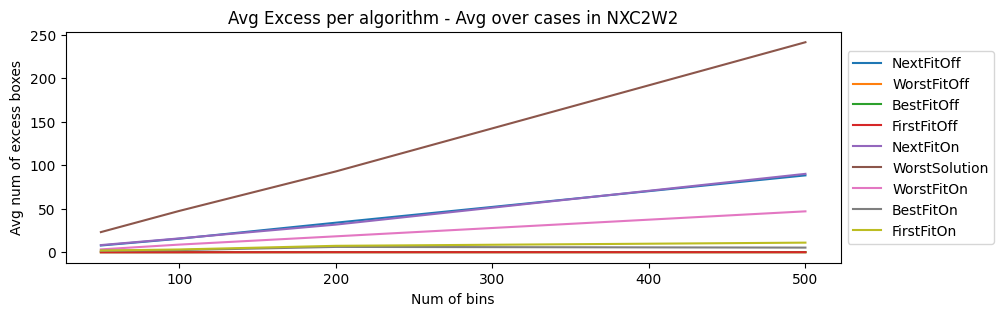

In [20]:
plt.figure(figsize=(10,3))

for i in avg_excess_fifty:
    plt.plot([50,100,200,500],[avg_excess_fifty[i],avg_excess_hundred[i],avg_excess_twohundred[i],avg_excess_fivehundred[i]], label = i)

plt.locator_params(axis='x', nbins=5)
plt.xlabel('Num of bins')
plt.ylabel('Avg num of excess boxes')
plt.title('Avg Excess per algorithm - Avg over cases in NXC2W2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Analysis of KPIs
Our two KPIs were how often the algorithms got the correct solution, and how many excess bins were used on average. We tested our algorithms using 100 bin capacity and a weight interval of 20-100.
We incremented the number of bins and tested to see how the performance would change as we increased the number of bins.
Some notable observations are that worst solution always uses the most number of bins. This is because it always assigns an object to its own bin so this is expected. Other algorithms like firstfit and worstfit used a low amount of excess bins and were correct the most. From this preliminary analysis, we can see that our firstfitOff and worstfitOff appear to be the most ideal 

## T4 - Refined First Fit

Task four had us implement the Refined First Fit algorithm, which would use a heuristic to classify bins and weights. There are for classes of bins called 1-4, and four item classes. A, B1, B2, and X. Each item goes into the corresponding bin under the following rules:<br>
        &nbsp;&nbsp;&nbsp;let m = [6,7,8,9] and k an integer >= 1, item i goes into a bin in<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;class 1, if i is an A-piece<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;class 2, if i is an B1-piece<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;class 3, if i is an B2-piece, but not the (mk)th B2-piece we've seen so far<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;class 1, if i is the (mk)th B2-piece we've seen so far<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;class 4, if i is an X-piece<br>

In [21]:
from macpacking.algorithms.online import RefinedFirstFitOn as RffOn
from macpacking.algorithms.offline import RefinedFirstFitOff as RffOff
[avg_excess_fifty, correct_percentage_fifty] = run_analyze_correctness(casesFifty, [RffOn,RffOff])
[avg_excess_hundred, correct_percentage_hundred] = run_analyze_correctness(casesHundred, [RffOn,RffOff])
[avg_excess_twohundred, correct_percentage_twohundred] = run_analyze_correctness(casesTwohundred, [RffOn,RffOff])
[avg_excess_fivehundred, correct_percentage_fivehundred] = run_analyze_correctness(casesFivehundred, [RffOn,RffOff])

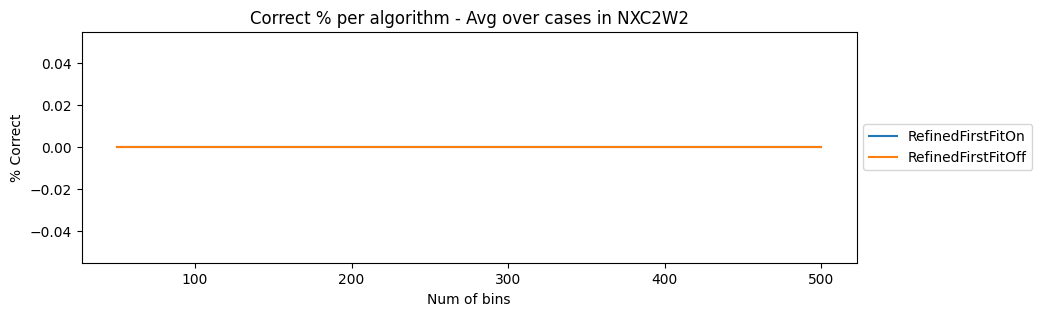

In [22]:


plt.figure(figsize=(10,3))

for i in correct_percentage_fifty:
    plt.plot([50,100,200,500],[correct_percentage_fifty[i],correct_percentage_hundred[i],correct_percentage_twohundred[i],correct_percentage_fivehundred[i]], label = i)

plt.locator_params(axis='x', nbins=5)
plt.xlabel('Num of bins')
plt.ylabel('% Correct')
plt.title('Correct % per algorithm - Avg over cases in NXC2W2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

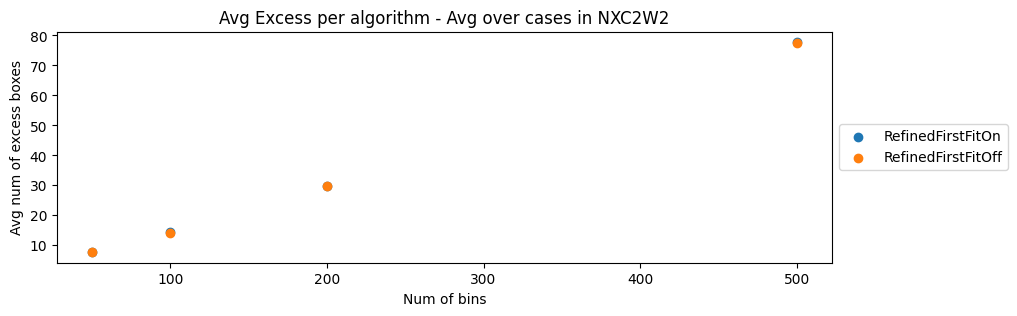

In [23]:
plt.figure(figsize=(10,3))

for i in correct_percentage_fifty:
    plt.scatter([50,100,200,500],[avg_excess_fifty[i],avg_excess_hundred[i],avg_excess_twohundred[i],avg_excess_fivehundred[i]], label = i)

plt.locator_params(axis='x', nbins=5)
plt.xlabel('Num of bins')
plt.ylabel('Avg num of excess boxes')
plt.title('Avg Excess per algorithm - Avg over cases in NXC2W2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

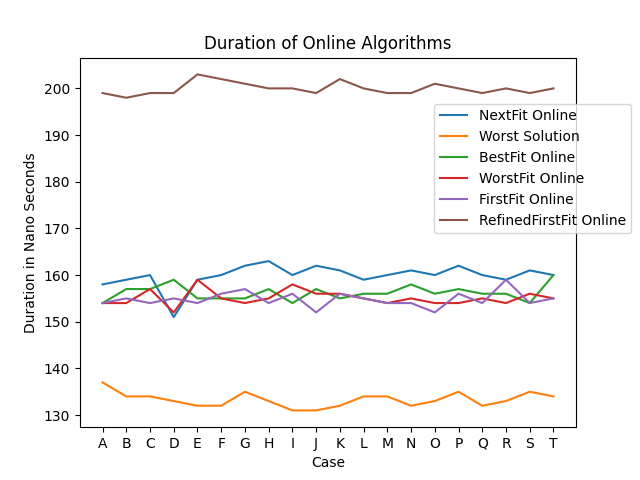

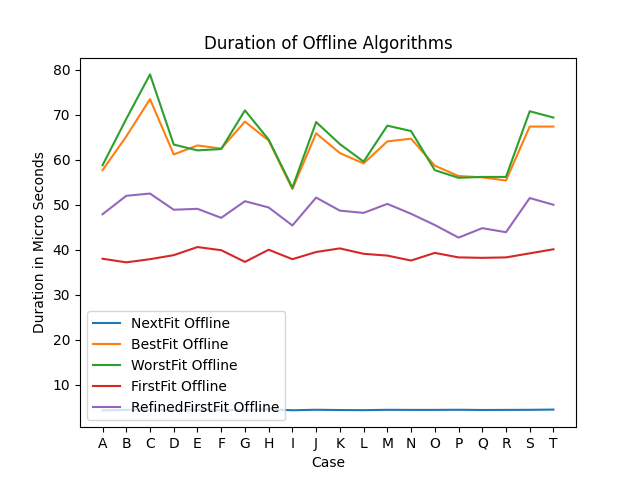

Note: Error bars omitted because they clutter the graph and make it too hard to read. To see error bars, go to ./analysis_tools/bench_grapher.py and uncomment the block comments containing "plt.errorbar(...

## Analysis of RFF
Refined first fit takes the longest amount of time out of any algorithm we have seen so far. Surpassing all other online algorithms by approximately at least 40 ns. This is probably due to it having to classify each item. It also used an excess amount of bins similar to nextfit. In general, we can conclude this algorithm is not an improvement in terms of accuracy compared to algorithms like bestfit.

## Self-reflection questions

As part of the self-reflection dimension of an experiential course, each member of the group is expected to answer to the following four questions:

  - What process did you go through to produce this result? (Backward)
  - What were your standards for this piece of work? Did you meet your standards? (Inward)
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)